# Data Science Regression Project: Predicting Home Prices in Banglore
Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

## Data Load: Load banglore home prices into a dataframe

In [134]:
df = pd.read_csv("bengaluru_house_prices.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [135]:
df.shape

(13320, 9)

In [136]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [137]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [138]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [139]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [140]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

### Drop features that are not required to build our model

In [141]:
df.drop(['area_type','society','balcony','availability'],axis = 1, inplace =True)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


## Data Cleaning: Handle NA values

In [142]:
df.shape

(13320, 5)

In [143]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [144]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [145]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [146]:
df.dropna(inplace = True)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [147]:
df.shape

(13246, 5)

In [148]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [149]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [150]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

## Feature Engineering
### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [151]:
df['size'][0].split(' ') #.split(separator) sunction works on string/object dtype

['2', 'BHK']

In [152]:
df['bhk']  = df['size'].apply(lambda x: int(x.split(' ')[0]))
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [153]:
df.shape

(13246, 6)

In [154]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [155]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [156]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

### Explore total_sqft feature

In [157]:
df.iloc[30]['total_sqft'] #it has range also

'2100 - 2850'

### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [158]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [159]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


### For above row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [160]:
df.shape

(13246, 6)

In [161]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [162]:
df.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [163]:
df.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [164]:
df.dropna(inplace = True)
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [165]:
df.shape

(13200, 6)

In [166]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [167]:
df.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [168]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [169]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


## Feature Engineering
### Add new feature called price per square feet

In [170]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [171]:
df.to_csv("bhp.csv",index=False)

In [172]:
df.shape

(13200, 7)

In [173]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [174]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [175]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [176]:
df['location'] = df['location'].apply(lambda x: x.strip()) #x.strip() removes the trailing and leading whitespaces from the string

In [177]:
len(df['location'].unique()) #initially it was 1298 but after removing trailing and leading whitespaces it is 1287.

1287

In [178]:
location_stats = df['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [179]:
location_stats.values.sum()

13200

In [180]:
len(location_stats[location_stats>10])

240

In [181]:
len(location_stats)

1287

In [182]:
len(location_stats[location_stats<=10])

1047

## Dimensionality Reduction
### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [183]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [184]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


## Outlier Removal Using Business Logic
### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft
### Check belowdata points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [185]:
df = df[~(df['total_sqft']/df['bhk']<300)]
df #removing outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [186]:
grouped_data = df.groupby(['location'])
for (col1_val), group in grouped_data:
    print(f'Group: col1={col1_val}')
    print(group)
    print("--------------------")

C:\Users\as\AppData\Local\Temp\ipykernel_16124\1309978473.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (col1_val), group in grouped_data:


Group: col1=1st Block Jayanagar
                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805

## Outlier Removal Using Standard Deviation and Mean
### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [187]:
df = pd.DataFrame()
for (col1_val), group in grouped_data:
    m = np.mean(group['price_per_sqft'])
    sd = np.std(group['price_per_sqft'])
    reduced_df = group[(group['price_per_sqft']>(m-sd)) & (group['price_per_sqft']<=(m+sd))]
    df = pd.concat([df,reduced_df],axis = 0,ignore_index=True)

df

C:\Users\as\AppData\Local\Temp\ipykernel_16124\3486902728.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (col1_val), group in grouped_data:


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [188]:
df.shape

(10242, 7)

In [189]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [190]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [191]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

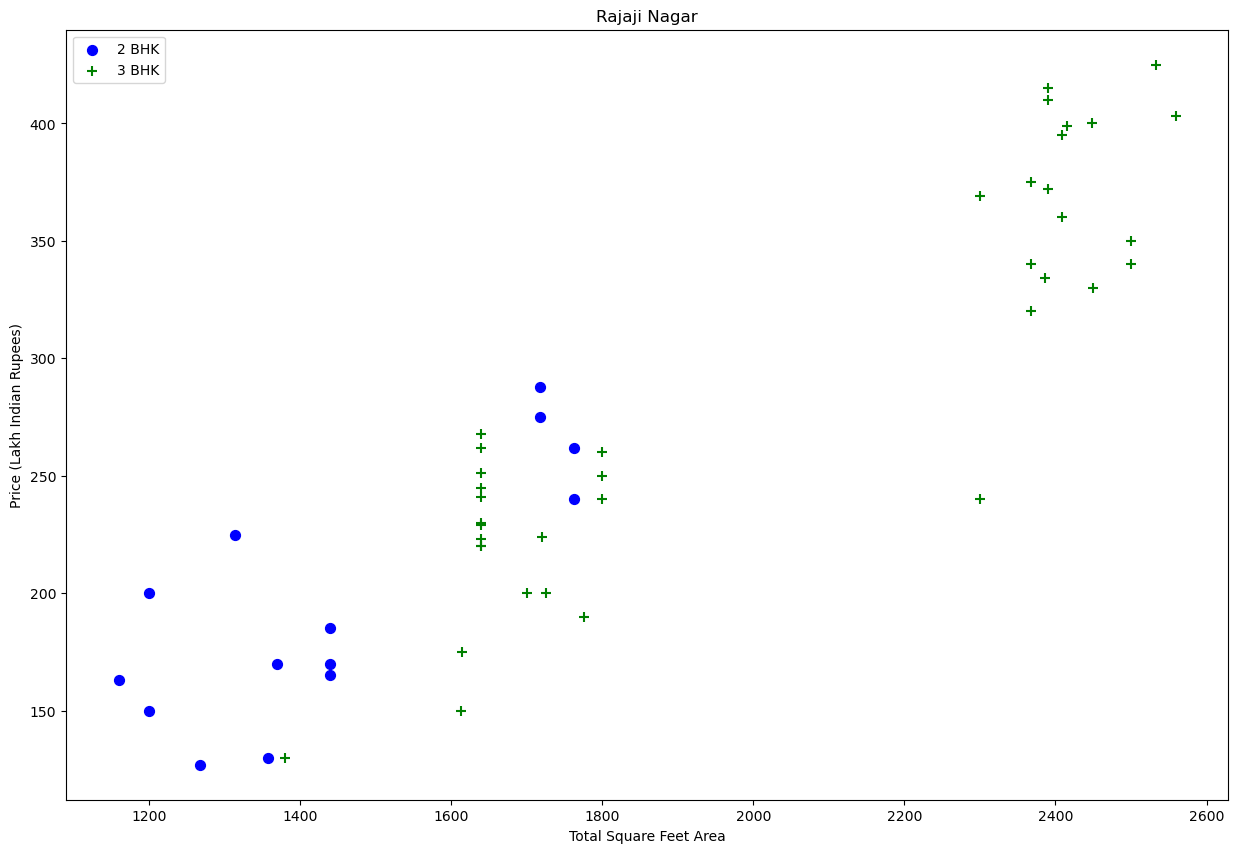

In [192]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location']==location) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location) & (df['bhk']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)  ##plt.figure(figsize=(15, 10))
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df,"Rajaji Nagar")

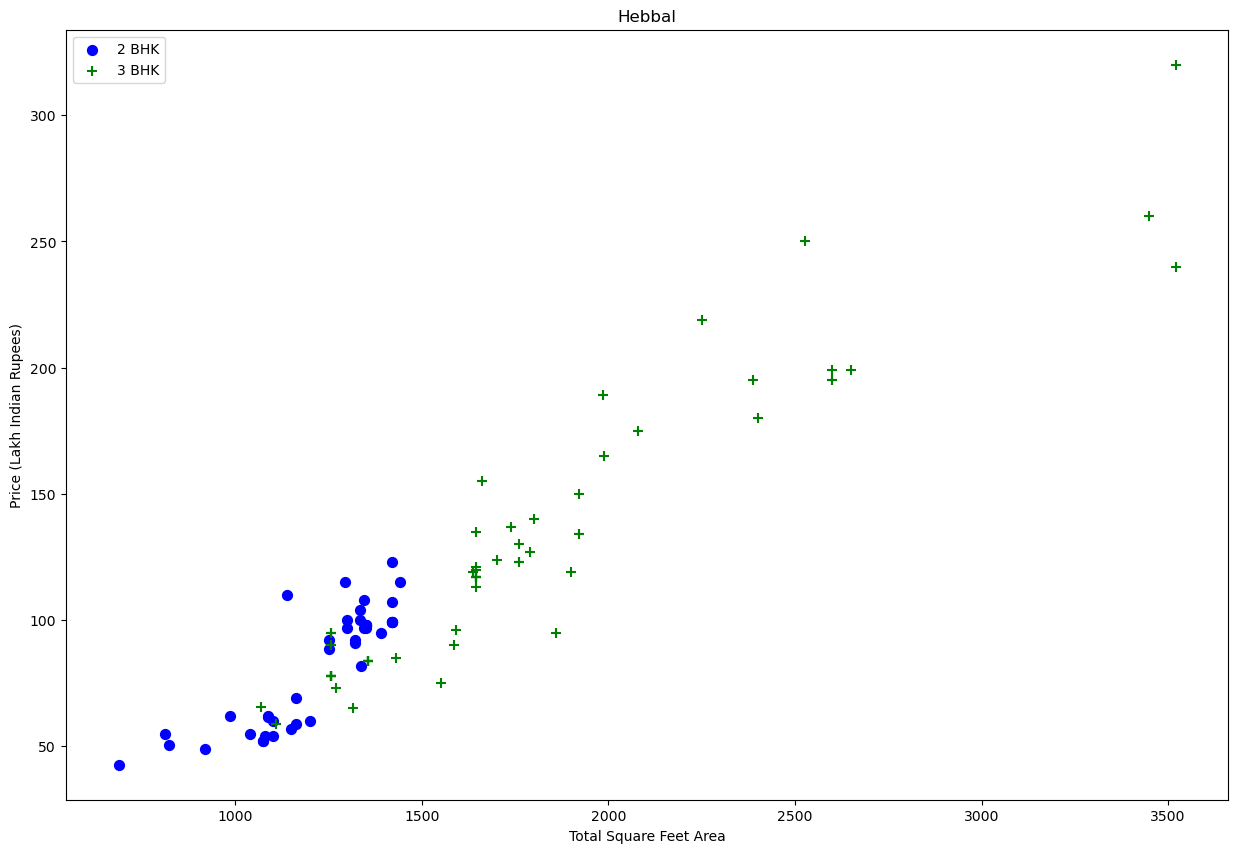

In [193]:
plot_scatter_chart(df,"Hebbal")

### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

### {
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
### }
### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [194]:
grouped_data = df.groupby(['location'])
for (col1_val), group in grouped_data:
    print(f'Group: col1={col1_val}')
    print(group)
    print("--------------------")

C:\Users\as\AppData\Local\Temp\ipykernel_16124\1309978473.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (col1_val), group in grouped_data:


Group: col1=1st Block Jayanagar
              location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
--------------------
Group: col1=1st Phase JP Nagar
              location       size  total_sqft  bath  price  bhk  \
7   1st Phase JP Nagar      4 BHK      2825.0   4.0  250.0    4   
8   1st Phase JP Nagar      3 BHK      1875.0   3.0  167.0    3   
9   1st Phase JP Nagar  5 Bedroom      1500.0   5.0   85.0    5   
10  1st Phase JP Nagar      3 BHK      2

In [195]:
df = pd.DataFrame()
for location, location_group in grouped_data:
    bhk_stats = {}
    new_grouped_data = location_group.groupby(['bhk'])
    for bhk, bhk_group in new_grouped_data:
        bhk_stats[bhk] = {
                'mean': np.mean(bhk_group['price_per_sqft']),
                'std': np.std(bhk_group['price_per_sqft']),
                'count': bhk_group.shape[0]
            }
    for bhk, bhk_group in new_grouped_data:
        stats = bhk_stats.get(bhk-1)
        if stats:
            if stats['count']<=5:
                df = pd.concat([df,bhk_group],axis = 0,ignore_index = True)
            else:
                reduced_df = bhk_group[bhk_group['price_per_sqft']>= stats['mean']]
                df = pd.concat([df,reduced_df],axis = 0,ignore_index = True)
        else:
            df = pd.concat([df,bhk_group],axis = 0,ignore_index = True)
            
df

C:\Users\as\AppData\Local\Temp\ipykernel_16124\2925093355.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for location, location_group in grouped_data:
C:\Users\as\AppData\Local\Temp\ipykernel_16124\2925093355.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for bhk, bhk_group in new_grouped_data:
C:\Users\as\AppData\Local\Temp\ipykernel_16124\2925093355.py:11: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for bhk, bhk_group in new_grouped_data:
C:\Users\as\AppDat

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
...,...,...,...,...,...,...,...
7312,other,10 Bedroom,3300.0,9.0,450.0,10,13636.363636
7313,other,11 BHK,5000.0,9.0,360.0,11,7200.000000
7314,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7315,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [196]:
df.shape

(7317, 7)

In [197]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [198]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [199]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

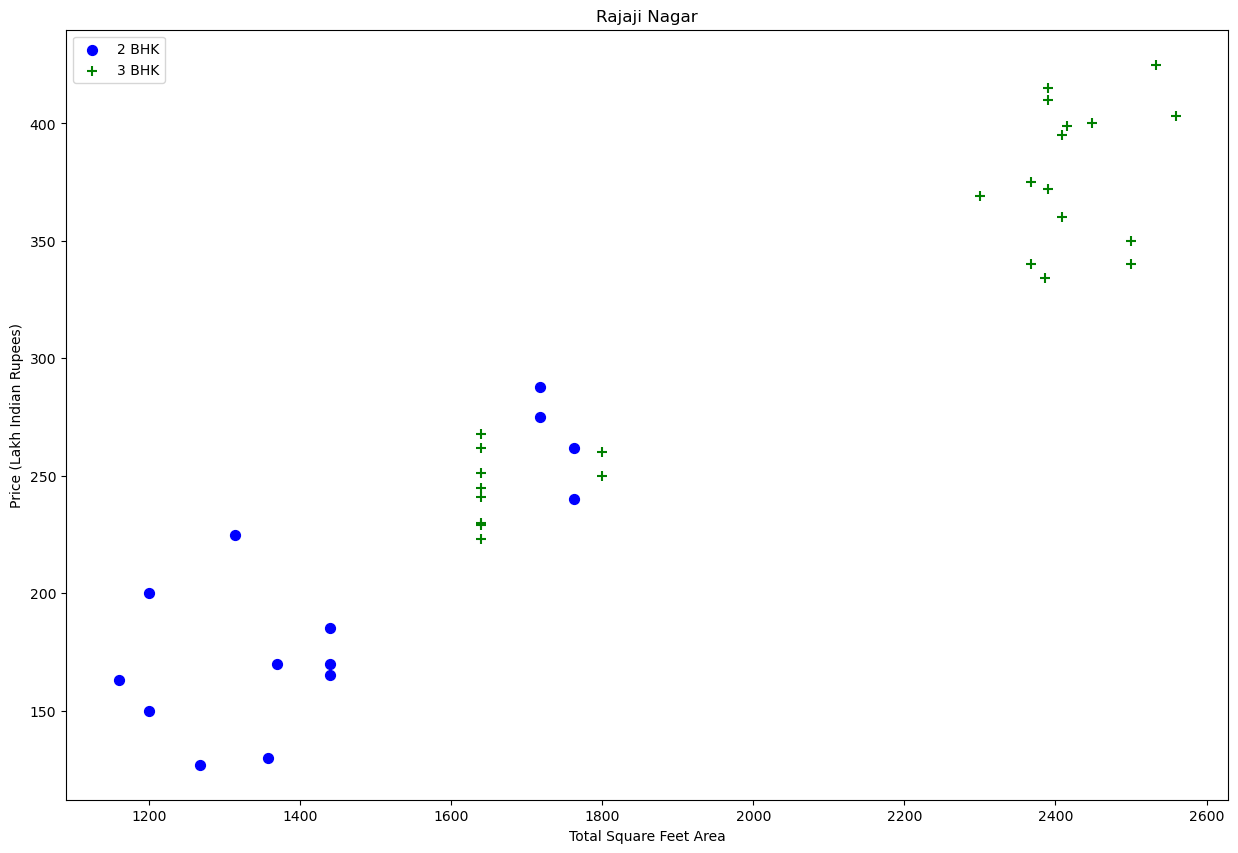

In [200]:
plot_scatter_chart(df,"Rajaji Nagar")

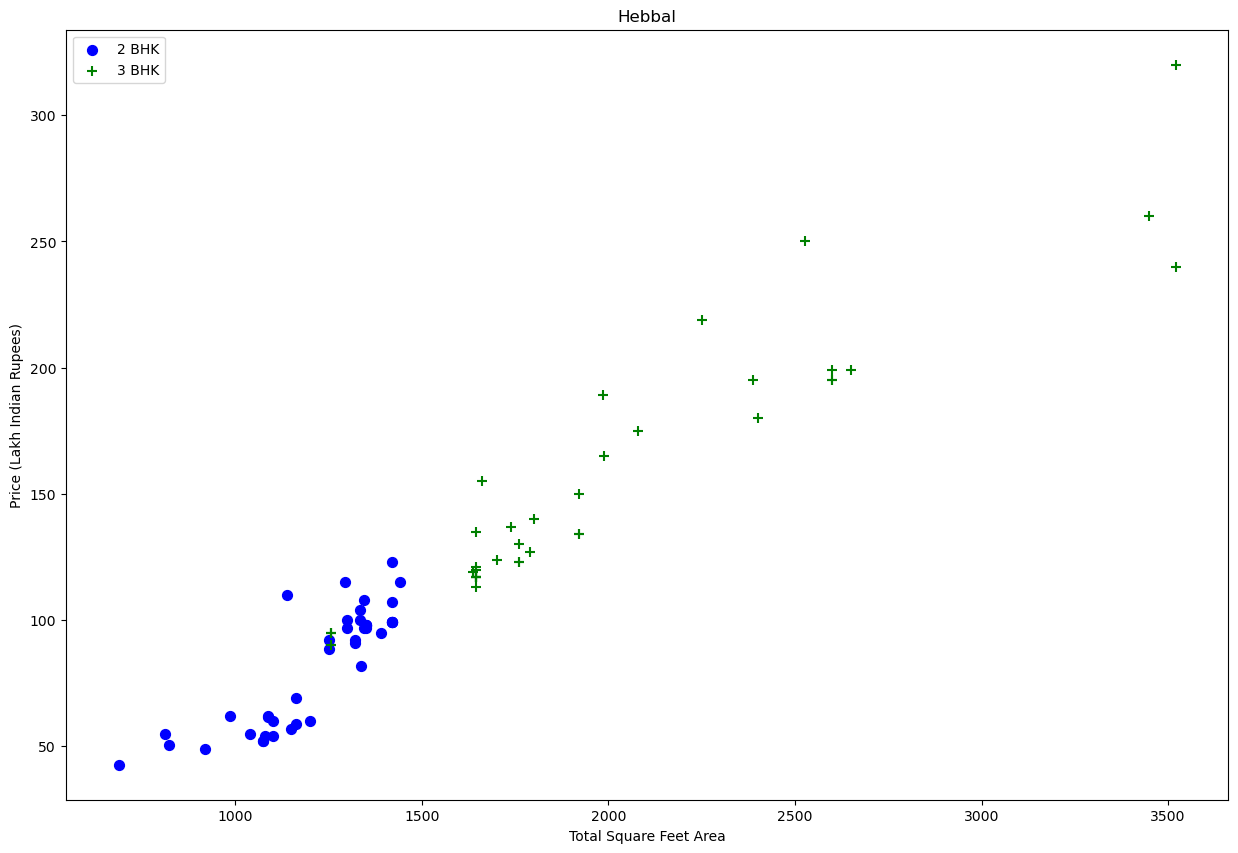

In [201]:
plot_scatter_chart(df,"Hebbal")

### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

## Before and after outlier removal: Rajaji Nagar
![PLOT](rajaji_nagar_outliers.png)

## Before and after outlier removal: Hebbal
![PLOT](hebbal_outliers.png)

Text(0, 0.5, 'Count')

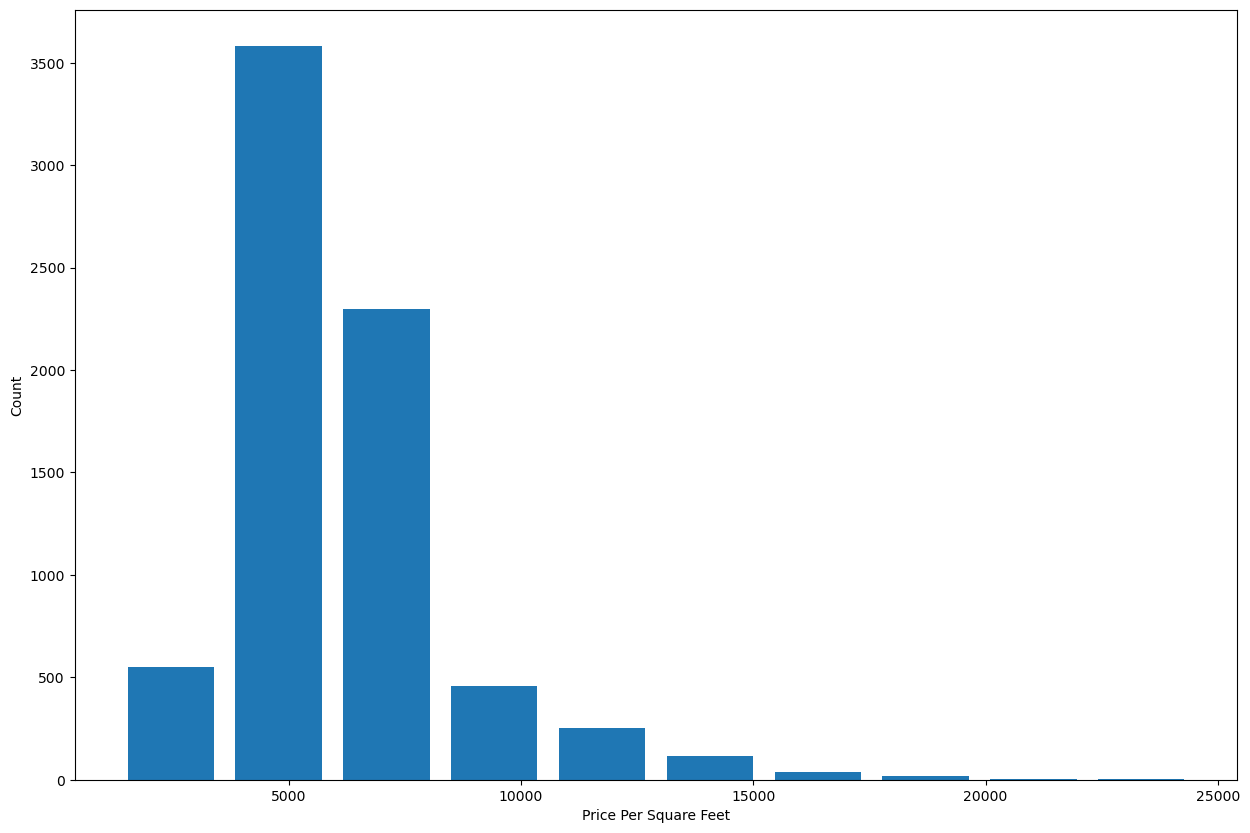

In [202]:
plt.figure(figsize=(15, 10))
plt.hist(df['price_per_sqft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

## Outlier Removal Using Bathrooms Feature
### It is unusual to have 2 more bathrooms than number of bedrooms in a home
### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [203]:
df = df[df['bath']<df['bhk']+2] #It is unusual to have 2 more bathrooms than number of bedrooms in a home
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
...,...,...,...,...,...,...,...
7312,other,10 Bedroom,3300.0,9.0,450.0,10,13636.363636
7313,other,11 BHK,5000.0,9.0,360.0,11,7200.000000
7314,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7315,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [204]:
df.drop(['size','price_per_sqft'],axis=1,inplace = True)
df

C:\Users\as\AppData\Local\Temp\ipykernel_16124\4289341411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['size','price_per_sqft'],axis=1,inplace = True)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1235.0,2.0,148.0,2
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,2850.0,4.0,428.0,4
...,...,...,...,...,...
7312,other,3300.0,9.0,450.0,10
7313,other,5000.0,9.0,360.0,11
7314,other,6000.0,12.0,150.0,11
7315,other,5425.0,13.0,275.0,13


In [205]:
df.shape

(7239, 5)

In [206]:
df.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [207]:
df.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [208]:
df.dtypes

location       object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

## Use One Hot Encoding For Location

In [210]:
dummy_df = pd.get_dummies(df['location'])
dummy_df

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [211]:
dummy_df.drop(['other'],axis = 1,inplace =True)
dummy_df

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
df = pd.concat([df,dummy_df],axis = 1)
df

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,other,3300.0,9.0,450.0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7313,other,5000.0,9.0,360.0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7314,other,6000.0,12.0,150.0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7315,other,5425.0,13.0,275.0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
df.drop(['location'],axis=1,inplace = True)
df

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,3300.0,9.0,450.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7313,5000.0,9.0,360.0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7314,6000.0,12.0,150.0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7315,5425.0,13.0,275.0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
df.shape

(7239, 244)

In [215]:
df.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [216]:
df.dtypes

total_sqft             float64
bath                   float64
price                  float64
bhk                      int64
1st Block Jayanagar      uint8
                        ...   
Yelachenahalli           uint8
Yelahanka                uint8
Yelahanka New Town       uint8
Yelenahalli              uint8
Yeshwanthpur             uint8
Length: 244, dtype: object

In [217]:
df.isna().sum()

total_sqft             0
bath                   0
price                  0
bhk                    0
1st Block Jayanagar    0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 244, dtype: int64

## Build a Model Now...

In [218]:
X = df.drop(['price'],axis = 1)
y = df['price']

In [219]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [220]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [221]:
reg.score(X_test,y_test)

0.8505944244017133

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [222]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88702824, 0.85615284, 0.86167733, 0.82674531, 0.8362293 ])

### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

## Find best model using GridSearchCV

In [232]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False]}
        },
        'lasso': {
            'model': Lasso(),
            'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse', 'friedman_mse'], 'splitter': ['best', 'random']}
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

C:\Users\as\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\as\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\as\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\as\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\as\anaconda3\Lib\site-packages\sklearn\utils\_

,model,best_score,best_params
0,linear_regression,0.854142,{'fit_intercept': False}
1,lasso,0.702117,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.764106,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.
## Test the model for few properties

In [245]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [238]:
np.where(X.columns == '1st Phase JP Nagar')[0][0]

4

In [250]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return reg.predict([x])[0]

In [251]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\as\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.50130962906545

In [252]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\as\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.21755622316604

In [253]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\as\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.21381102547093

In [254]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\as\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


183.93005761957153

## Export the tested model to a pickle file

In [255]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(reg,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [256]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))